In [28]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

**Import binding energies calculated with revPBE, rVV10, and vDW-DF2**

In [45]:
with open(os.path.join('data', 'structures_df2_calc_with_bands_be.json')) as fhandle:
        df2 = json.load(fhandle)
with open(os.path.join('data', 'structures_rvv10_calc_with_bands_be.json')) as fhandle:
        rvv10 = json.load(fhandle)
with open(os.path.join('data', 'structures_revpbe_calc_with_bands_be.json')) as fhandle:
        revpbe = json.load(fhandle)

In [30]:
df2['41a0956f-91be-469e-8e98-58188e746301']

{'cell': [[16.8562741837162, 0.0, 0.0],
  [0.0, 7.22133640167749, 0.0],
  [0.0, 0.0, 6.91643636329717]],
 'volume': 841.902015349062,
 'binding_energy': {'relevant_dimension_of_highest_dimensionality_substructure': 121.724826359526,
  'binding_energy_per_substructure': -2.35420277139929,
  'number_of_atoms_in_bulk': 32,
  'uuid': '2964aca5-ac8d-4cc8-bf76-d9ca5c439fec',
  'delta_min': 0.7,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['Pmma (51)'],
  'relevant_dimension_units': 'ang^2',
  'transformation_mat': [[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]],
  'energy_units': 'eV',
  'sub_structure_dim': [2],
  'energy_bulk': -51375.7611599322,
  'sub_structure_formulas': ['Br22Nb8Rb2']},
 'uuid_pw': 'd7ec50df-0de7-4ee6-95dd-0d9cdd0ad19b'}

***For some structures, we have binding energies with both rVV10 and vDW-DF2:***

In [31]:
    binding_energies_raw = {}
    for uuid_key in set(df2).union(rvv10):
        subdict = {}
        df2_binding_energy = df2.get(uuid_key, {}).get('binding_energy', {})
        if df2_binding_energy:
            subdict['df2'] = df2_binding_energy
        rvv10_binding_energy = rvv10.get(uuid_key, {}).get('binding_energy', {})
        if rvv10_binding_energy:
            subdict['rvv10'] = rvv10_binding_energy
        if subdict:
            binding_energies_raw[uuid_key] = subdict
    
    print("Found {} entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand".format(
        len(binding_energies_raw)))

    binding_energies = {}
    for key, val in binding_energies_raw.items():
        subdict = defaultdict(dict)
        subdict['sub_structure_formulas'] = []
        for method in ['rvv10', 'df2']:
            try:
                # meV / ang^2, with positive sign
                subdict[method] = ( -1000. *
                    val[method]['binding_energy_per_substructure']/
                    val[method]['relevant_dimension_of_highest_dimensionality_substructure'])
                subdict['sub_structure_formulas'] += val[method]['sub_structure_formulas'] # Might need to skip the non-2D ones
            except KeyError as exc:
                # Binding energy not computed with this method
                if str(exc) != "'{}'".format(method):
                    print(str(exc), method)
                    raise
        subdict['sub_structure_formulas'] = sorted(set(subdict['sub_structure_formulas']))
        binding_energies[key] = dict(subdict.items())
    BN_structures = {k: v for k, v in binding_energies.items() if 'BN' in v['sub_structure_formulas']}
    print("Structures containing BN:")
    print(json.dumps(BN_structures, indent=2))

Found 2663 entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand
Structures containing BN:
{
  "8f2e38e9-01d5-4208-adaf-daa461ac8139": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 24.43280244214127,
    "df2": 19.38081606716093
  },
  "f7e2ff32-27ed-4c89-9c3c-4acbaffbb897": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 25.073826446277092,
    "df2": 20.06262819882249
  },
  "967b8f61-56d9-4082-8e85-cb834f47d8ac": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 25.157073954185357,
    "df2": 20.298162003656397
  }
}


In [32]:
binding_energies_raw['5152efb8-1470-4d3b-999f-aac46e5c6758']

{'df2': {'relevant_dimension_of_highest_dimensionality_substructure': 26.051195073268,
  'binding_energy_per_substructure': -0.546954113597167,
  'number_of_atoms_in_bulk': 14,
  'uuid': '954b3ada-7a5a-41a5-af1b-19cafcb4258e',
  'delta_min': 0.6,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['P-1 (2)'],
  'relevant_dimension_units': 'ang^2',
  'transformation_mat': [[1.0, -1.0, 0.0],
   [-0.0, -0.0, 1.0],
   [0.0, -1.0, -0.0]],
  'energy_units': 'eV',
  'sub_structure_dim': [2],
  'energy_bulk': -54233.1567725866,
  'sub_structure_formulas': ['Bi4O8Sr2']},
 'rvv10': {'relevant_dimension_of_highest_dimensionality_substructure': 26.6315120874066,
  'binding_energy_per_substructure': -0.792859168097493,
  'number_of_atoms_in_bulk': 14,
  'uuid': '78e36a32-3735-438b-955c-64a54e4757fb',
  'delta_min': 0.6,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['P-1 (2)'],
  'relevant_dimension_units': 'ang^2',
  'trans

***Let's see how many substructures we have:***

In [33]:
import itertools

In [34]:
all_sub_structure_formulas = [binding_energies[key]['sub_structure_formulas'] for key in binding_energies.keys()]

In [35]:
len(all_sub_structure_formulas)

2663

***All the sub-structures aren't unique:***

In [46]:
all_sub_structure_formulas.sort()
all_sub_structure_formulas = list(num for num,_ in itertools.groupby(all_sub_structure_formulas))

In [47]:
len(all_sub_structure_formulas)

2388

***In total, we have 2388 unique sub-structures:***

In [38]:
sub_structure_binding = {}
for i in all_sub_structure_formulas:
    sub_structure_binding[str(i)] = {}
    for key, v in binding_energies.items():
        if i == v['sub_structure_formulas']:  
            sub_structure_binding[str(i)][key] = v
            

In [39]:
sub_structure_binding["['BN']"]

{'8f2e38e9-01d5-4208-adaf-daa461ac8139': {'sub_structure_formulas': ['BN'],
  'rvv10': 24.43280244214127,
  'df2': 19.38081606716093},
 'f7e2ff32-27ed-4c89-9c3c-4acbaffbb897': {'sub_structure_formulas': ['BN'],
  'rvv10': 25.073826446277092,
  'df2': 20.06262819882249},
 '967b8f61-56d9-4082-8e85-cb834f47d8ac': {'sub_structure_formulas': ['BN'],
  'rvv10': 25.157073954185357,
  'df2': 20.298162003656397}}

In [40]:
len(sub_structure_binding)

2388

***Let define EE, PE, and HBE compounds based on the criteria mentioned in the paper:***

In [42]:
EE = {}
PE = {}
HBE = {}
for key in sub_structure_binding.keys():
    for uuid in sub_structure_binding[key].keys():
        if 'rvv10' in sub_structure_binding[key][uuid].keys():
            if 'df2' in sub_structure_binding[key][uuid].keys():
                if sub_structure_binding[key][uuid]['rvv10'] <= 35 or sub_structure_binding[key][uuid]['df2'] <=30:
                    EE[key]= sub_structure_binding[key][uuid]
                elif 35 < sub_structure_binding[key][uuid]['rvv10'] <= 130 or 30 < sub_structure_binding[key][uuid]['df2'] <= 130:
                    PE[key]= sub_structure_binding[key][uuid]
                else:
                    HBE[key] = sub_structure_binding[key][uuid]
            else:
                if sub_structure_binding[key][uuid]['rvv10'] <= 35:
                    EE[key]= sub_structure_binding[key][uuid]
                elif 35 < sub_structure_binding[key][uuid]['rvv10'] <= 130:
                    PE[key]= sub_structure_binding[key][uuid]
                else:
                    HBE[key] = sub_structure_binding[key][uuid] 
        else:
            if sub_structure_binding[key][uuid]['df2'] <=30:
                EE[key]= sub_structure_binding[key][uuid]
            elif 30 < sub_structure_binding[key][uuid]['df2'] <= 130:
                PE[key]= sub_structure_binding[key][uuid]
            else:
                HBE[key] = sub_structure_binding[key][uuid]

In [43]:
print('Number of EE compounds:', len(EE))
print('\n')
print('Number of PE compounds:', len(PE))
print('\n')
print('Number of HBE compounds:', len(HBE))
print('\n')
print('Total numbers of labeled structures:', len(EE)+len(PE)+len(HBE))

Number of EE compounds: 1002


Number of PE compounds: 765


Number of HBE compounds: 629


Total numbers of labeled structures: 2396


***Regenerate the figure in the paper:***

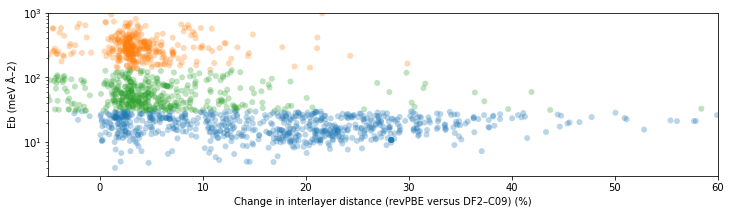

1560


In [44]:
i = 0
color = ['tab:blue',  'tab:green', 'tab:orange']
fig, ax = plt.subplots(figsize=(12, 3))
for key in revpbe.keys():
    if key in binding_energies.keys():
    
        try:
            x = abs(df2[key]['cell'][2][2]-revpbe[key]['cell'][2][2])/df2[key]['cell'][2][2]*100
            y = binding_energies[key]['df2']
            if y <= 30:
                a = plt.scatter(x,y, c = color[0], alpha=0.3, edgecolors='none', label = color[0])
                i = i +1
            elif 30 < y <= 130:
                b = plt.scatter(x,y, c = color[1], alpha=0.3, edgecolors='none', label = color[1])
                i = i +1
            else:
                plt.scatter(x,y, c = color[2], alpha=0.3, edgecolors='none', label = color[2])
                i = i +1
        except KeyError:
            pass
plt.yscale('log')
plt.xlim((-5,60))
plt.ylim((3,1000))
plt.xlabel("Change in interlayer distance (revPBE versus DF2–C09) (%)")
plt.ylabel("Eb (meV Å–2)")
plt.savefig("fig2.pdf",bbox_inches='tight',dpi=600)
plt.show()
print(i)